# Illustration of Regularization Technique using Dropout Layer
- Adding a Dropout layer is a popularly used regularization method (to prevent overfitting) in NN. 
- For example, if you define dropout rate as 0.2, then 20% of the neurons in each layer are dropped during an epoch.  
- Consider image below. 
- Assume we have taken 0.5 as dropout. 
- Then, in one of the epochs, node 2 and node 4 may be dropped, and in the next epoch, something else may be dropped.
- This happens randomly in each layer for each epoch. 
- The whole process is done during training.
- As we did dropout during training, to compensate this during prediction, we multiply the activation of each of the unit where dropout is applied by the factor of dropout.


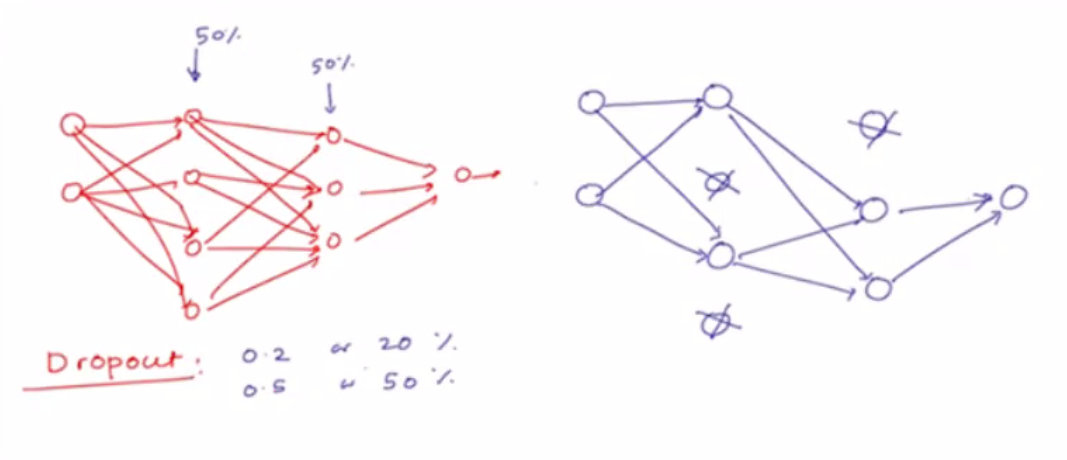

In [1]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train, x_test = x_train / 255.0 , x_test / 255.0

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [6]:
model.compile(optimizer='adam', 
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
y_train.shape

(60000,)

In [7]:
model.fit(x_train, y_train, epochs= 5)

Epoch 1/5
1875/1875 [==============================] - 2s 690us/step - loss: 0.2968 - accuracy: 0.9135
Epoch 2/5
1875/1875 [==============================] - 1s 765us/step - loss: 0.1434 - accuracy: 0.9575
Epoch 3/5
1875/1875 [==============================] - 2s 893us/step - loss: 0.1066 - accuracy: 0.9672
Epoch 4/5
1875/1875 [==============================] - 1s 772us/step - loss: 0.0881 - accuracy: 0.9727
Epoch 5/5
1875/1875 [==============================] - 1s 675us/step - loss: 0.0747 - accuracy: 0.9763


In [8]:
y_train[0]

5

In [9]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 545us/step - loss: 0.0722 - accuracy: 0.9774


[0.07217659056186676, 0.977400004863739]

# Using callbacks to control training
- When we want to stop the training after reaching certain accuracy value, we write a call back function with a condition to check the accuracy.
- Here, at the end of every epoch, we check whether required accuracy is reached or not.
- If the accuracy is reached, we will stop there, and next epoch will not be executed.
- If required accuracy is not reached, then the model will continue with next epoch.


In [10]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, log={}):    # Logs are going to contain all the epoch steps. Also, on_epoch_end is a built in function name so cant modify 
        if (log.get('accuracy') > 0.95):
            print('\n Reached 95% accuracy so cancelling training!')
            self.model.stop_training = True
            
            
callbacks = myCallback()
model.fit(x_train, y_train, epochs=200, callbacks=[callbacks])

Epoch 1/200
1875/1875 [==============================] - 1s 682us/step - loss: 0.0663 - accuracy: 0.9791

 Reached 95% accuracy so cancelling training!


# C.N.N

### Prepare the MNIST Dataset 

In [11]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In [12]:
print('Number of axis in train images : ', train_images.ndim)
print('Number of axis in test images : ', test_images.ndim)
print('Shape of train images : ', train_images.shape)
print('Shape of test images : ', test_images.shape)

Number of axis in train images :  3
Number of axis in test images :  3
Shape of train images :  (60000, 28, 28)
Shape of test images :  (10000, 28, 28)


In [13]:
print(train_images[0].ndim)
print(train_images[0].shape)

2
(28, 28)


# Reshape the data 

- MNIST Dataset consists of grey scale image.
- Grey Scale image has depth 1. (Unlike RGB where depth is 3).
- Each image is of 28 x 28. 
- We reshape image into a 3-D tensor so that the input becomes a 4D tensor (first dimention being total number of images in the dataset - that is 60000 for training set) 
- This is done to satisfy the input requirement of CNN 

In [14]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [15]:
print('After Reshaping : ')
print('Number of axis in train images : ', train_images.ndim)
print('Number of axis in test images : ', test_images.ndim)
print('Shape of train images : ', train_images.shape)
print('Shape of test images : ', test_images.shape)

After Reshaping : 
Number of axis in train images :  4
Number of axis in test images :  4
Shape of train images :  (60000, 28, 28, 1)
Shape of test images :  (10000, 28, 28, 1)


# Normalisation of Data 

In [16]:
train_images, test_images = train_images/255.0 , test_images/255.0

# Create a convolutional base 

In [17]:
model = keras.models.Sequential()

The 6 lines of code below defines the convolitonal of the base using common pattern 
- A stack of Conv2D and MaxPooling2D layers
- As an input, CNN takes tensor of shape (image_height, image_width, color_channels), ignoring the batch size 
- Here, we will configure the CNN to process the input of the shape (28, 28, 1) which is the format of the MNIST image 
- we do this by passing argument input_shape to the first layer 

In [18]:
# First layer has 32 filters has (3, 3) size and stride has 1. We are not using padding in any convolution layer. 
# syntax of conv2D
# Conv2D (NumberOfFilters, activationFunction, InputShape)
model.add(keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28,1)))   # 32 is filter thats basically neurons. ie, 32 neurons 

- In the above CNN layer, 32 filters are there each if 3 x 3
- The numebr of filters are similar to the number of neurons, since each neuron performa a different convolution on the input to the layer. (Neurons input weights from convolution kernels)
- A feature map is the resut of applying the filter (thus, you have as many feature map as filter) and the size is the result of the kernal size of the filter and stride 
- Stride is taken as 1
- When we apply 3x3 filter with stride 1 on 28x28 image the shape of the image will become(26,26,1)

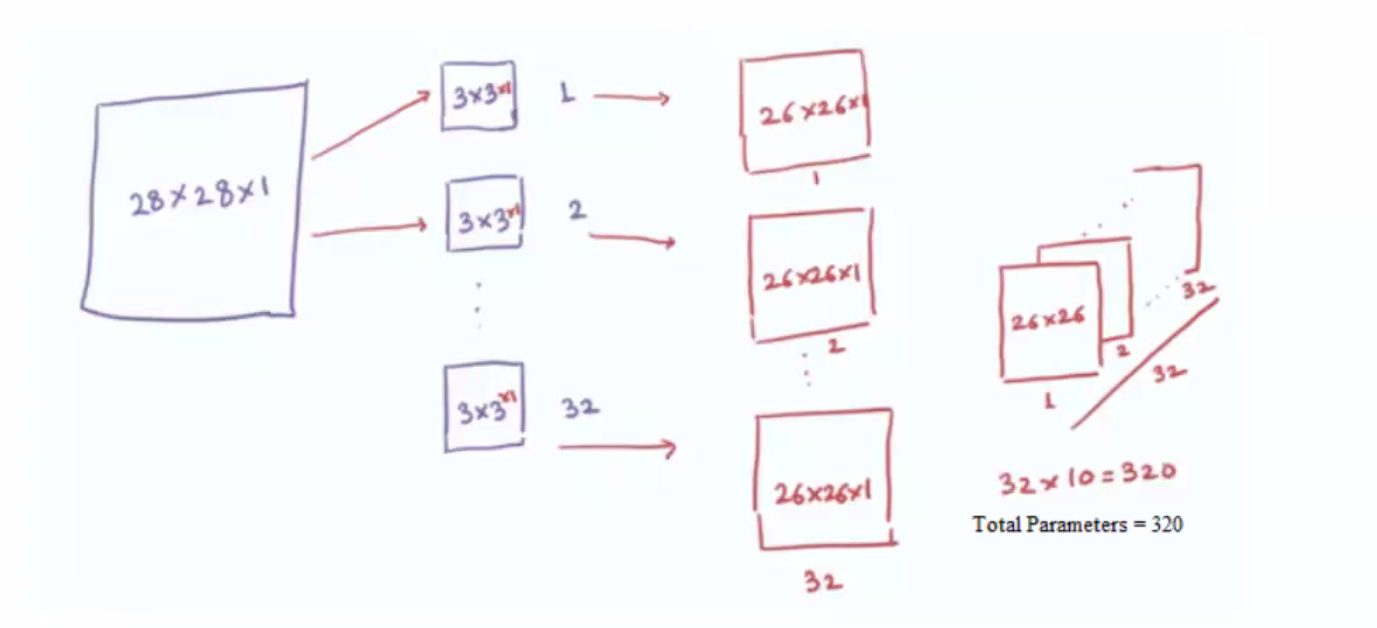

**NOTE** 
- If 2 different convolutional filters are applied to the input image, it results in 2 different feature maps (the output of the filters). 
- Each pixel of each feature map is an output of the convolutional layer.
- For instance, if you have 28x28 input images and a convolutional layer with 20 7x7 filters and stride 1, you will get 20 22x22 feature maps at the output of this layer. 
- Note that this is presented to the next layer as a volume with width = height = 22 and depth = num_channels = 20.


# Adding pooling layer 
- Pooling is used to down-sample the output of convolution aggressively. 
- It is conceptually similar to strided convolution. 
- It consists of extracting a specific window from input feature and compute the output based on pooling policy (Either **max pooling** or **average pooling**)
- Pooling is usually done with the window of size 2*2 with a stride of 2. 
- It is not necessary that every convlution layer should be followed by a pooling layer.
- Sometimes, we can have pooling after a few convolution layers as well. 
- **Pooling is also used for avoiding over-fitting in the model**


In [19]:
model.add(keras.layers.MaxPool2D((2,2)))

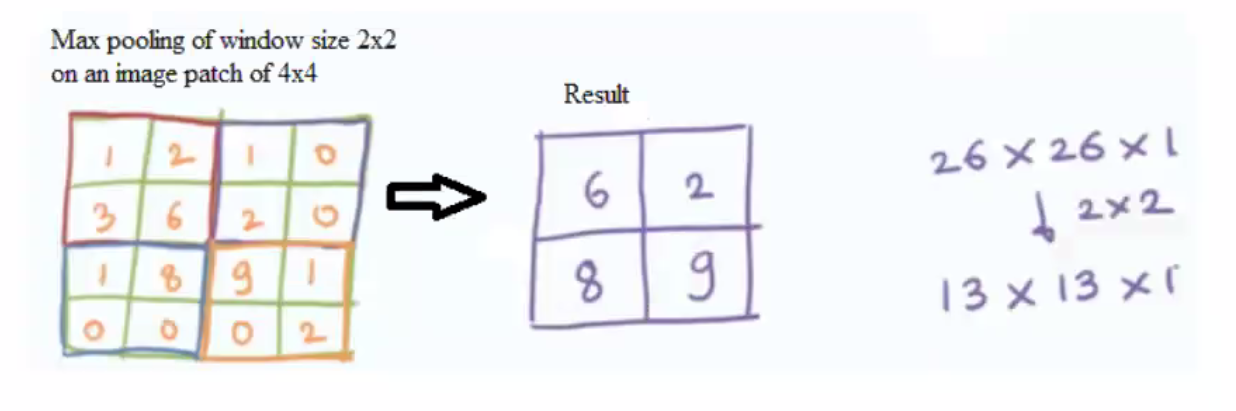

In [20]:
# Second layer has 64 filters 
model.add(keras.layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(keras.layers.MaxPool2D((2,2)))

In [21]:
# Third layer has 64 filters 
model.add(keras.layers.Conv2D(64, (3,3), activation = 'relu'))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


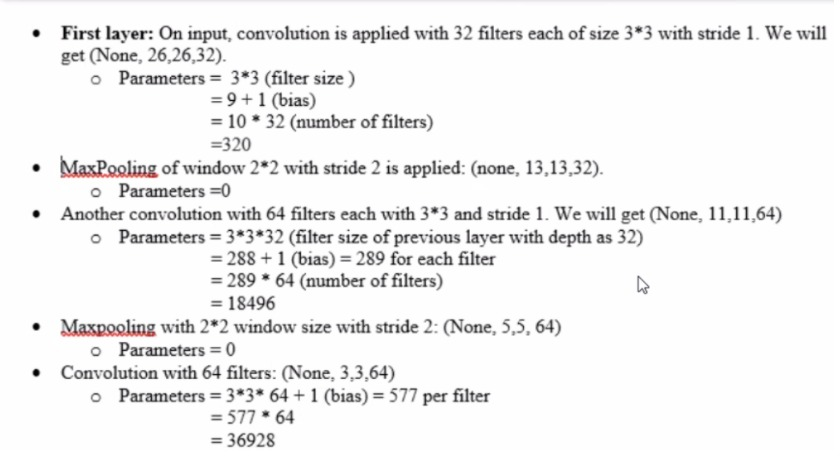

Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as we go deeper in the network. The number of output channels for each Conv2D is controlled by the first argument (ex. 32 or 64). Typically, as width and height shrink, we can afford (computationally) to add more output channels in each Conv2D layer


## Add Dense layers on top
To complete our model, we will feed the last output tensor from the convolutional base (of shape (3,3,64)) into one or more dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. So, first we will flatten (or unroll) the 3D output into 1D, then add one or more Dense layers on top. MNIST has 10 output classes, we we use final Dense layer with 10 outputs and a softmax activation.


In [23]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

As you can see, our(3,3,64) were flattened into 576 before passing into dense layer 

In [25]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [26]:
model.fit(train_images, train_labels, validation_split=0.2, epochs=2)

Epoch 1/2
1500/1500 [==============================] - 16s 11ms/step - loss: 0.1609 - accuracy: 0.9515 - val_loss: 0.0684 - val_accuracy: 0.9797
Epoch 2/2
1500/1500 [==============================] - 16s 11ms/step - loss: 0.0492 - accuracy: 0.9843 - val_loss: 0.0488 - val_accuracy: 0.9842


# Evaluate  the model

In [27]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0412 - accuracy: 0.9867
0.9866999983787537


As you can see, ACCURACY is 0.9866999983787537

# Classification with FeedForward Neural Network 

It is important to compare the CNN iwth FFNN that we used earlier 

In [28]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test /255.0

In [29]:
model_dnn = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(20, activation = 'softmax')
])

In [30]:
model_dnn.compile(optimizer='adam', 
                 loss = 'sparse_categorical_crossentropy', 
                 metrics=['accuracy'])

In [31]:
model_dnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_5 (Dense)              (None, 20)                1300      
Total params: 51,540
Trainable params: 51,540
Non-trainable params: 0
_________________________________________________________________


In [32]:
model_dnn.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 627us/step - loss: 0.3199 - accuracy: 0.9097
Epoch 2/5
1875/1875 [==============================] - 1s 656us/step - loss: 0.1628 - accuracy: 0.9510
Epoch 3/5
1875/1875 [==============================] - 1s 640us/step - loss: 0.1185 - accuracy: 0.9653
Epoch 4/5
1875/1875 [==============================] - 1s 649us/step - loss: 0.0918 - accuracy: 0.9721
Epoch 5/5
1875/1875 [==============================] - 1s 650us/step - loss: 0.0736 - accuracy: 0.9783


In [33]:
test_loss, test_acc = model_dnn.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 544us/step - loss: 0.0885 - accuracy: 0.9718


In [ ]:
# Grid Search Algorithm 


## Q] Please do it using fashion mnist 